In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/aptos2019-blindness-detection/test.csv
/kaggle/input/aptos2019-blindness-detection/sample_submission.csv
/kaggle/input/aptos2019-blindness-detection/train.csv
/kaggle/input/aptos2019-blindness-detection/train_images/f233638e0e90.png
/kaggle/input/aptos2019-blindness-detection/train_images/43823561c3f0.png
/kaggle/input/aptos2019-blindness-detection/train_images/e1e490773462.png
/kaggle/input/aptos2019-blindness-detection/train_images/33e7bf536fc5.png
/kaggle/input/aptos2019-blindness-detection/train_images/7831ce1d895e.png
/kaggle/input/aptos2019-blindness-detection/train_images/248dec89b3a2.png
/kaggle/input/aptos2019-blindness-detection/train_images/cd3fd04d72f5.png
/kaggle/input/aptos2019-blindness-detection/train_images/a80dab8eddf4.png
/kaggle/input/aptos2019-blindness-detection/train_images/a01024054596.png
/kaggle/input/aptos2019-blindness-detection/train_images/ef5155990874.png
/kaggle/input/aptos2019-blindness-detection/train_images/c80b0f27541a.png
/kaggle/input

/kaggle/input/aptos2019-blindness-detection/train_images/bfe467b7e997.png
/kaggle/input/aptos2019-blindness-detection/train_images/4c570172778b.png
/kaggle/input/aptos2019-blindness-detection/train_images/ebf4b22240f4.png
/kaggle/input/aptos2019-blindness-detection/train_images/0212dd31f623.png
/kaggle/input/aptos2019-blindness-detection/train_images/a53d6d2472a6.png
/kaggle/input/aptos2019-blindness-detection/train_images/633fe9dbaf39.png
/kaggle/input/aptos2019-blindness-detection/train_images/96c3e3db68bc.png
/kaggle/input/aptos2019-blindness-detection/train_images/d06ccd0cf4b8.png
/kaggle/input/aptos2019-blindness-detection/train_images/f03d3c4ce7fb.png
/kaggle/input/aptos2019-blindness-detection/train_images/0ef4c61dc056.png
/kaggle/input/aptos2019-blindness-detection/train_images/c334f8688b77.png
/kaggle/input/aptos2019-blindness-detection/train_images/1864d3411143.png
/kaggle/input/aptos2019-blindness-detection/train_images/57f933d3d7c7.png
/kaggle/input/aptos2019-blindness-dete

/kaggle/input/aptos2019-blindness-detection/train_images/789c60cba801.png
/kaggle/input/aptos2019-blindness-detection/train_images/a9c7b83caf81.png
/kaggle/input/aptos2019-blindness-detection/train_images/f4de9620e3f2.png
/kaggle/input/aptos2019-blindness-detection/train_images/b086c7cd3868.png
/kaggle/input/aptos2019-blindness-detection/train_images/0232dfea7547.png
/kaggle/input/aptos2019-blindness-detection/train_images/fcc32dffd24d.png
/kaggle/input/aptos2019-blindness-detection/train_images/c5ba9e455d5e.png
/kaggle/input/aptos2019-blindness-detection/train_images/9b0eb9f41da4.png
/kaggle/input/aptos2019-blindness-detection/train_images/c947bb6cf9f6.png
/kaggle/input/aptos2019-blindness-detection/train_images/1ee355480567.png
/kaggle/input/aptos2019-blindness-detection/train_images/1269ab57c2e6.png
/kaggle/input/aptos2019-blindness-detection/train_images/c1ebe785503a.png
/kaggle/input/aptos2019-blindness-detection/train_images/0a3202889f4d.png
/kaggle/input/aptos2019-blindness-dete

/kaggle/input/aptos2019-blindness-detection/test_images/cf99da5598c2.png
/kaggle/input/aptos2019-blindness-detection/test_images/79726ebe9844.png
/kaggle/input/aptos2019-blindness-detection/test_images/64a4926e85b5.png
/kaggle/input/aptos2019-blindness-detection/test_images/f7cb2e6212b2.png
/kaggle/input/aptos2019-blindness-detection/test_images/7d7cbd5ee1b3.png
/kaggle/input/aptos2019-blindness-detection/test_images/ad4c27a10804.png
/kaggle/input/aptos2019-blindness-detection/test_images/697fb916ad18.png
/kaggle/input/aptos2019-blindness-detection/test_images/3bee147be104.png
/kaggle/input/aptos2019-blindness-detection/test_images/7d747f8387a8.png
/kaggle/input/aptos2019-blindness-detection/test_images/7f3d521363ab.png
/kaggle/input/aptos2019-blindness-detection/test_images/e48caeb90d74.png
/kaggle/input/aptos2019-blindness-detection/test_images/980b5ca190ce.png
/kaggle/input/aptos2019-blindness-detection/test_images/6356f9dd9fdc.png
/kaggle/input/aptos2019-blindness-detection/test_im

In [2]:
# other imports/set up
import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.applications.vgg16 import vgg16

Using TensorFlow backend.


In [3]:
# import the data and specify the paths
sample_submission = pd.read_csv("../input/aptos2019-blindness-detection/sample_submission.csv")
test = "../input/aptos2019-blindness-detection/test_images"
train = "../input/aptos2019-blindness-detection/train_images"
df_test = pd.read_csv("../input/aptos2019-blindness-detection/test.csv")
df_train = pd.read_csv("../input/aptos2019-blindness-detection/train.csv")

In [4]:
# look at the info of the training data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
id_code      3662 non-null object
diagnosis    3662 non-null int64
dtypes: int64(1), object(1)
memory usage: 57.3+ KB


In [5]:
# look at the head of the training data
df_train.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [6]:
#https://www.kaggle.com/carlolepelaars/efficientnetb5-with-keras-aptos-2019
print("Image IDs and Labels (TRAIN)")
# Add extension to id_code
df_train['id_code'] = df_train['id_code'] + ".png"
print(f"Training images: {df_train.shape[0]}")
display(df_train.head())
print("Image IDs (TEST)")
# Add extension to id_code
df_test['id_code'] = df_test['id_code'] + ".png"
print(f"Testing Images: {df_test.shape[0]}")
display(df_test.head())

Image IDs and Labels (TRAIN)
Training images: 3662


,id_code,diagnosis
0,000c1434d8d7.png,2
1,001639a390f0.png,4
2,0024cdab0c1e.png,1
3,002c21358ce6.png,0
4,005b95c28852.png,0


Image IDs (TEST)
Testing Images: 1928


,id_code
0,0005cfc8afb6.png
1,003f0afdcd15.png
2,006efc72b638.png
3,00836aaacf06.png
4,009245722fa4.png


In [7]:
# check columns
for i in df_train:
    print(i)

id_code
diagnosis


In [8]:
# look at train info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
id_code      3662 non-null object
diagnosis    3662 non-null int64
dtypes: int64(1), object(1)
memory usage: 57.3+ KB


In [9]:
# look at train examples
df_train.head()

,id_code,diagnosis
0,000c1434d8d7.png,2
1,001639a390f0.png,4
2,0024cdab0c1e.png,1
3,002c21358ce6.png,0
4,005b95c28852.png,0


In [10]:
# image data generators
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   validation_split=0.2,
                                  rotation_range=360,
                                  horizontal_flip=True,
                                  vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
# train generator
train_generator = train_datagen.flow_from_dataframe(df_train,
                                                    x_col='id_code', 
                                                    y_col='diagnosis', 
                                                    directory=train, 
                                                    target_size=(244,244), 
                                                    class_mode='raw',
                                                   subset='training')

# validation generator
val_generator = train_datagen.flow_from_dataframe(df_train,
                                                 x_col='id_code',
                                                 y_col='diagnosis',
                                                 directory=train,
                                                 target_size=(244,244),
                                                 class_mode='raw',
                                                 subset='validation')


Found 2930 validated image filenames.
Found 732 validated image filenames.


In [12]:
# get vgg16 model 
model_vgg16 = keras.applications.vgg16.VGG16(include_top=False, weights='imagenet',input_shape=(244,244,3))

58892288/58889256 [==============================] - 1s 0us/step


In [13]:
# vgg16 summary
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 244, 244, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 244, 244, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 244, 244, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 122, 122, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 122, 122, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 122, 122, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 61, 61, 128)       0     

In [14]:
# make it so the vgg models are not trainable
for layers in model_vgg16.layers:
    layers.trainable = False

In [15]:
# create a model, add fcn to the vgg model
model = Sequential()
model.add(model_vgg16)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 21,138,757
Trainable params: 6,424,069
Non-trainable params: 14,714,688
_________________________________________________________________


In [16]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

In [17]:
# fit the model
history = model.fit_generator(train_generator,
                             epochs=20,
                             validation_data=val_generator,
                             verbose=1)

Epoch 1/20
92/92 [==============================] - 441s 5s/step - loss: 1.4852 - accuracy: 0.5625 - val_loss: 0.9600 - val_accuracy: 0.6735
Epoch 2/20
92/92 [==============================] - 381s 4s/step - loss: 0.9759 - accuracy: 0.6423 - val_loss: 0.8468 - val_accuracy: 0.6762
Epoch 3/20
92/92 [==============================] - 382s 4s/step - loss: 0.9358 - accuracy: 0.6696 - val_loss: 0.7973 - val_accuracy: 0.6844
Epoch 4/20
92/92 [==============================] - 381s 4s/step - loss: 0.9206 - accuracy: 0.6799 - val_loss: 0.9570 - val_accuracy: 0.6899
Epoch 5/20
92/92 [==============================] - 379s 4s/step - loss: 0.9084 - accuracy: 0.6850 - val_loss: 0.8245 - val_accuracy: 0.7036
Epoch 6/20
92/92 [==============================] - 377s 4s/step - loss: 0.8963 - accuracy: 0.6843 - val_loss: 0.7692 - val_accuracy: 0.6954
Epoch 7/20
92/92 [==============================] - 376s 4s/step - loss: 0.8995 - accuracy: 0.6805 - val_loss: 0.7602 - val_accuracy: 0.6967
Epoch 8/20
92

In [18]:
# check the model performance
history.history

{'val_loss': [0.9600478410720825,
  0.8467761874198914,
  0.7972546815872192,
  0.9570109248161316,
  0.8245201110839844,
  0.7692113518714905,
  0.7602396607398987,
  0.7523197531700134,
  0.6620909571647644,
  0.7213739156723022,
  0.8312212824821472,
  0.7043718099594116,
  0.8643249869346619,
  0.9964531064033508,
  0.7841255068778992,
  0.95112544298172,
  0.9192928671836853,
  0.7155424952507019,
  0.6996099352836609,
  0.7861409783363342],
 'val_accuracy': [0.6734972596168518,
  0.6762295365333557,
  0.6844262480735779,
  0.6898906826972961,
  0.7035518884658813,
  0.6953551769256592,
  0.6967213153839111,
  0.7062841653823853,
  0.7172130942344666,
  0.7035518884658813,
  0.7144808769226074,
  0.7076502442359924,
  0.7267759442329407,
  0.7131147384643555,
  0.7076502442359924,
  0.7090163826942444,
  0.7008196711540222,
  0.7158470153808594,
  0.7144808769226074,
  0.7158470153808594],
 'loss': [1.4889147948079549,
  0.9754532914112859,
  0.9369896634446883,
  0.92109449214902

In [19]:
# function to plot the loss
def train_validation_loss_plot():
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(loss) + 1)
    
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    return plt.show()

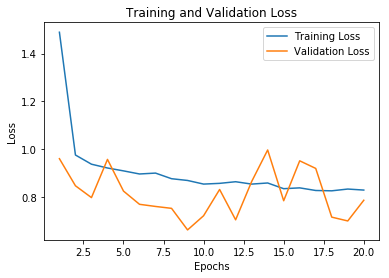

In [20]:
# plot loss
train_validation_loss_plot()

In [21]:
# function to plot accuracy
def train_validation_accuracy_plot():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    return plt.show()

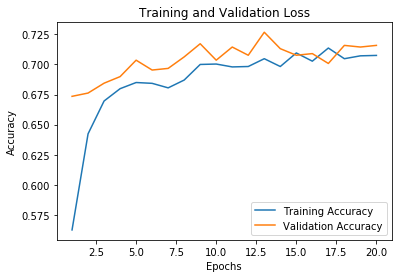

In [22]:
# plot the accuracy
train_validation_accuracy_plot()